## Pandas



In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import norm 

In [8]:
# Importing the data :

# df = pd.read_excel("./titanic.xls")
# df.shape
# df.head()
# df.columns
# df = df.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1, errors='ignore')


df = pd.read_excel("./titanic.xls")
df.shape
df.head(n=10)
df.columns
df = df.drop([ 'name', 'sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'] , axis=1)
df.head(n=10)

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
5,1,1,male,48.0000
6,1,1,female,63.0000
7,1,0,male,39.0000
8,1,1,female,53.0000
9,1,0,male,71.0000


In [9]:
df.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [11]:
""" 
- count 
- mean 
- std 
- min 
- 25% : q_{1/4}
- 50% : q_{1/2} médiane
- 75% :{q_3/4}
- max 
"""
df.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [6]:
# cleaning the data :
df = df.dropna(axis=0)
df.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [36]:
# en peu d'analyse :

# nombres des personnes dans chanque classe :
df["pclass"].value_counts()

# Group by : La moyenne des fammes ayant survécu

df.groupby("sex").mean()


# moyenne_femmes_survécu = df[(df["sex"] == "female") ]["survived"].mean()
# moyenne_femmes_survécu # 0.7525773195876289

# Group by : La moyenne des fammes ayant survécu par classe 


df.groupby(["sex" , "pclass"]).mean()


survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [8]:
nombre_femmes_classe1_survived = df[(df['sex'] == 'female') & (df['pclass'] == 1) & (df['survived'] == 1)].shape[0]
print(nombre_femmes_classe1_survived)

# nombre_femmes_classe3 = df[(df['sex'] == 'female') & (df['pclass'] == 3)].shape[0]
# print(nombre_femmes_classe3)


128


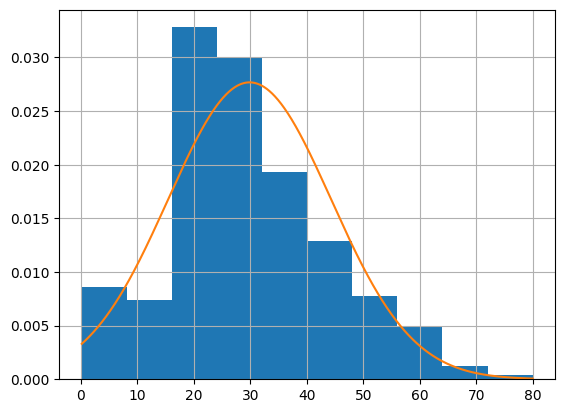

In [9]:
# visualisation : Age 

df["age"].hist(density=True)    
mu =  df["age"].mean()
sigma = df["age"].std()
x = np.linspace(df["age"].min(), df["age"].max(), 1000)
plt.plot(x, norm.pdf(x , mu , sigma), label="Loi normale")


<Axes: xlabel='pclass'>

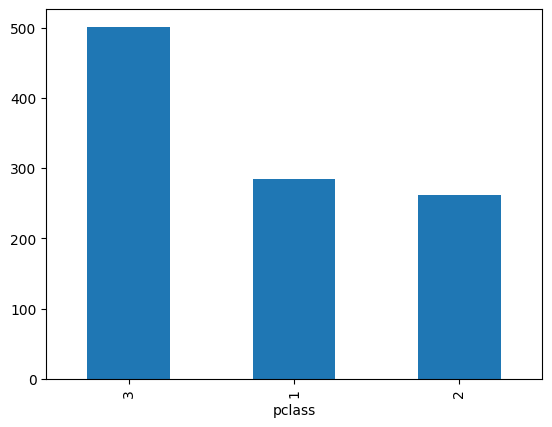

In [10]:
# df.plot.scatter(x="sex" ,y="age")
df["pclass"].value_counts().plot.bar()


In [11]:
df["age"]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

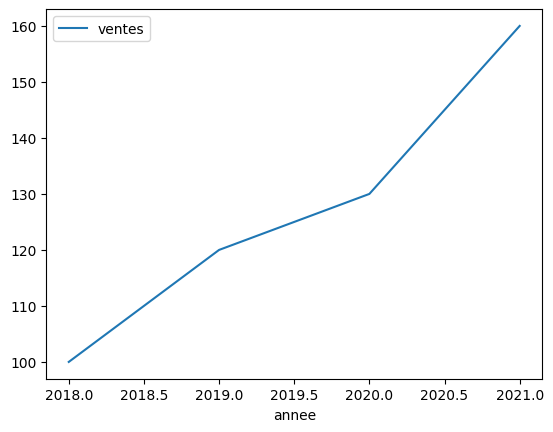

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'annee': [2018, 2019, 2020, 2021],
    'ventes': [100, 120, 130, 160]
})
df.plot(x='annee', y='ventes', kind='line')
plt.show()

In [4]:
df_tp = pd.read_csv("./SOCR-HeightWeight.csv")
df_tp.drop(['Index'] , axis=1  , inplace=True)


df_tp['Height(Inches)'] = df_tp['Height(Inches)']*0.0254
df_tp['Weight(Pounds)'] = df_tp['Weight(Pounds)']*0.453592
df_tp.columns = ["Taille(m)" ,"Poids(kg)"]

df_tp.head()

df_tp.describe()

,Taille(m),Poids(kg)
count,25000.000000,25000.000000
mean,1.727025,57.642209
std,0.048303,5.289290
min,1.531070,35.386871
25%,1.694292,54.117461
50%,1.727091,57.677738
75%,1.759533,61.186318
max,1.908881,77.529759


<Axes: xlabel='Taille(m)', ylabel='Poids(kg)'>

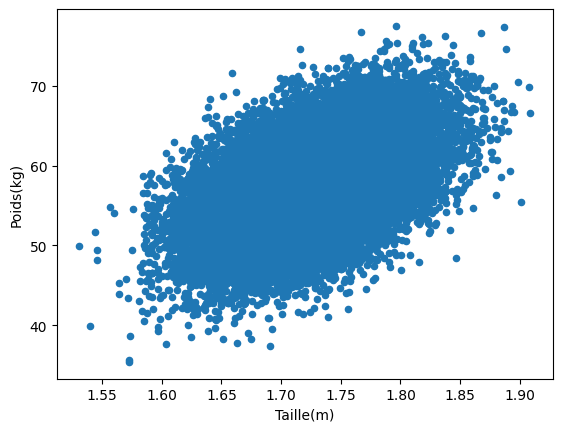

In [22]:
df_tp.plot.scatter(x="Taille(m)" , y = "Poids(kg)")

<Axes: >

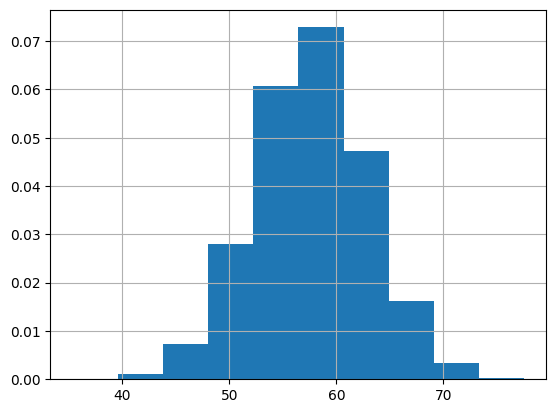

In [5]:
# distrubition du poids 

df_tp["Poids(kg)"].hist(density=True)